# Australia - Antarctica spreading rates

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pygplates
import numpy as np
import csv

from velocities_by_plate_id import calculate_velocities
from velocities_by_plate_id import calculate_velocities_along_reconstructed_geometry
from velocities_by_plate_id import calculate_velocities_over_time

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
rotation_filename = 'Data/Matthews_etal_GPC_2016_410-0Ma_GK07.rot'
reconstruction_feature = 'Data/Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz'

australia_plateID = 801

anchor_plate = 0


In [3]:
reconstruction_time = 140 # Ma

reconstructed_shapefile = "reconstruction_{:3.0f}.shp"

pygplates.reconstruct(reconstruction_feature, \
                      rotation_filename, \
                      reconstructed_shapefile.format(reconstruction_time), \
                      reconstruction_time)



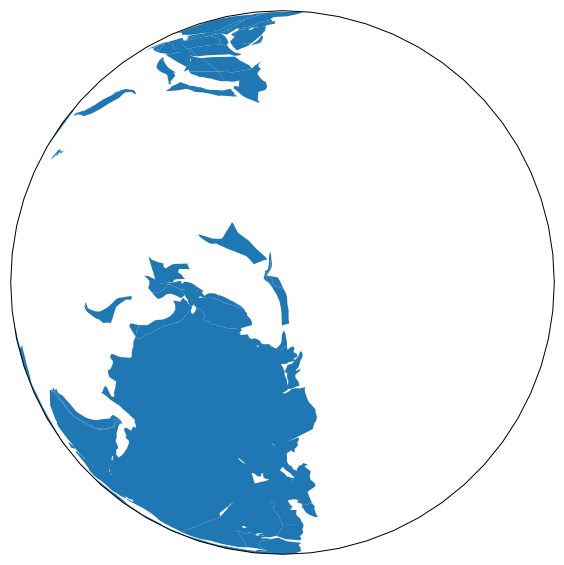

In [4]:
# proj = ccrs.NearsidePerspective(140, -40, satellite_height=4e6)
proj = ccrs.Orthographic(140,-40)
# proj = ccrs.AzimuthalEquidistant(140, -40, )

shp = shpreader.Reader(reconstructed_shapefile.format(reconstruction_time)).geometries()
ft  = cfeature.ShapelyFeature(shp, ccrs.PlateCarree())


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=proj)
ax.add_feature(ft)

In [5]:
points_downunder = np.array([[145.0, -38.0], # Victoria
                             [133.0, -23.0], # central Australia
                             [122.0, -16.0]]) #NW Australia
#points_downunder can be any array, for example a buncg of points along the SE coast of Australia in this case
npts = points_downunder.shape[0]

# create point features
point_features = []
for lon, lat in points_downunder:
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))
    point_feature.set_reconstruction_plate_id(australia_plateID)
    point_features.append(point_feature)


reconstruction_times = np.arange(0, 140, 1) # Ma

lons_out = np.empty((reconstruction_times.size, npts))
lats_out = np.empty((reconstruction_times.size, npts))
vels_out = np.empty((reconstruction_times.size, npts))

for t, reconstruction_time in enumerate(reconstruction_times):
    out_data = calculate_velocities(rotation_filename, point_features, 1, reconstruction_time, anchor_plate_id=802)
    tlon, tlat, vel, ovel, arc, oarc, plateID = np.array(out_data).T
    
    lons_out[t] = tlon
    lats_out[t] = tlat
    vels_out[t] = vel


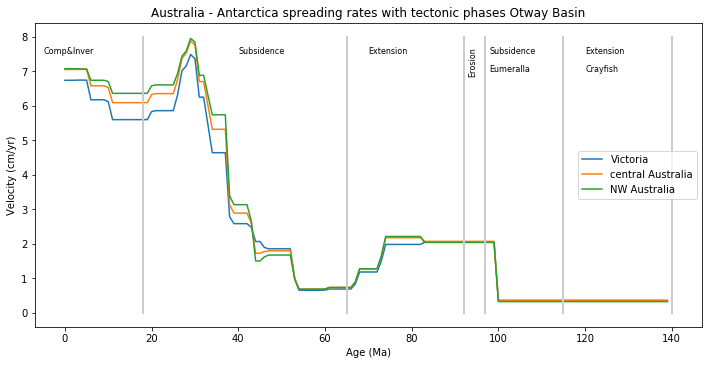

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='Age (Ma)', ylabel='Velocity (cm/yr)')
label=["Victoria", "Central Australia", "NW Australia"]

for pt in range(npts):
     plt.plot(reconstruction_times, vels_out[:,pt], label=label[pt])

#Adding tectonic phases Otway Basin 
ul=[18,65,92,97,115,140] #These are the ages of the tectonic phases in Ma
for i in range(0,len(ul),1):
    plt.plot([ul[i],ul[i]], [ 0,8],  color=(.8, 0.8, 0.8, ), lw=2)

fs=8
plt.text(120,7, "Crayfish", fontsize=fs)
plt.text(120,7.5, "Extension", fontsize=fs)
plt.text(98, 7, "Eumeralla", fontsize=fs)
plt.text(98, 7.5, "Subsidence", fontsize=fs)
plt.text(93, 7.5, "Erosion", fontsize=fs, rotation=90)
plt.text(70, 7.5, "Extension", fontsize=fs)
plt.text(40, 7.5, "Subsidence", fontsize=fs)
plt.text(-5, 7.5, "Comp&Inver", fontsize=fs)
plt.tight_layout()
#plt.savefig("./Basinward_distance_time.pdf")
plt.title("Australia - Antarctica spreading rates with tectonic phases Otway Basin") 
ax.legend()

In [7]:
#This is how to get the plate ID's
feat = pygplates.FeatureCollection(reconstruction_feature)
for f in feat:
    print f.get_reconstruction_plate_id(), f.get_name()

104 Mexico
630 Honshu and Kyushu, Japan
625 C. Hokkaido
329 Betic (Spain)
503 Arabia
505 Lut (Iran)
50601 Helmand (Central Afghanistan)
7701 Tunisia
501 India
616 East Qiangtang
613 Dangerous Grounds and Reed Bank
216 Cayman Ridge, Caribbean
612 Northside South China Sea
205 Northern Yucatan Basin
601 Sea of Japan
821 Tonga Ridge
823 Kermadec Ridge
253 S Hispanola (San Juan)
628 Central Honshu
401 Peri Siberia
373 Novaya-Semya
372 Yamal Peninsula (western Kara Sea)
302 Eurasia
311 East Svalbard, Northern Europe
886 Southern Dampier Ridge, Tasman Sea
283 North Patagonian Massif
813 Eastern Province, southern South Island, NZ
813 South New Zealand & Campbell Plateau
222 Jamacia
212 Guayape, Central America
834 Norfolk
835 Three Kings Rise
844 North Norfolk Ridge
847 North Bismark Basin
679 West Halmahera Block
697 East Halmahera Block
69702 Torricelli Terrane, North New Guinea
604 Indochina
604 Indochina
60402 Malay Peninsula
18102 Ruby Terrane
602 South China
602 South China
602 West Ta